In [17]:
# Import Modules
#data manipulation
import numpy as np
import pandas as pd

#nn
import torch
import torch.nn as nn
import torch.optim as optim
from scipy.optimize import minimize

#visualization
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error

torch.manual_seed(1)

In [22]:
# Load the Data
df=pd.read_excel('v3_BMED_data.xlsx', sheet_name = 'Opt')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       221 non-null    float64
 1   V       221 non-null    int64  
 2   E       221 non-null    float64
 3   Ci      221 non-null    float64
 4   t       221 non-null    float64
 5   CF      221 non-null    float64
 6   CA      221 non-null    float64
 7   SEC     221 non-null    float64
 8   JLA     221 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 15.7 KB


## model 1


In [30]:
# Set the training data
X = df[['T','V','E','Ci','t']].values
Y = df[['CF']].values

# transform the pytorch tensor
Xt = torch.FloatTensor(X)
Yt = torch.FloatTensor(Y)

# Declare the Custom Models
class CustomModel_CF(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Sequential(
            nn.Linear(5,4),
            nn.ReLU(),
            nn.Linear(4,4),
            nn.ReLU(),
            nn.Linear(4,2),
            nn.ReLU(),
            nn.Linear(2,1),
        )

    def forward(self, x):
        return self.hidden(x)
    

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
iter = 0
scores = []
for train_index, test_index in kfold.split(Xt):
    X_train, X_test = Xt[train_index], Xt[test_index]
    Y_train, Y_test = Yt[train_index], Yt[test_index]
    
    # NN model initialization
    model_CF = CustomModel_CF()
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model_CF.parameters(), lr = 0.0001)

    # Learning Loop
    num_epochs = 10000
    
    for epoch in range(num_epochs+1):
        # forward_propagation
        y_pred = model_CF(X_train)
        loss = criterion(y_pred,Y_train)

        # back_propagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 200 == 0:
            print(f'iter : {iter+1}, epoch: {epoch}, loss: {loss.item()}')
    yp = model_CF(X_test).detach().numpy()
    Y_test = Y_test.detach().numpy()
    mse_score = mean_squared_error(Y_test,yp)
    scores.append(mse_score)
    iter += 1
print(sum(scores) / len(scores))

iter : 1, epoch: 0, loss: 2.903550148010254
iter : 1, epoch: 200, loss: 2.8551855087280273
iter : 1, epoch: 400, loss: 2.808746576309204
iter : 1, epoch: 600, loss: 2.7634263038635254
iter : 1, epoch: 800, loss: 2.7191884517669678
iter : 1, epoch: 1000, loss: 2.675997734069824
iter : 1, epoch: 1200, loss: 2.633821725845337
iter : 1, epoch: 1400, loss: 2.5926296710968018
iter : 1, epoch: 1600, loss: 2.5523931980133057
iter : 1, epoch: 1800, loss: 2.5130865573883057
iter : 1, epoch: 2000, loss: 2.4746856689453125
iter : 1, epoch: 2200, loss: 2.437168598175049
iter : 1, epoch: 2400, loss: 2.400515079498291
iter : 1, epoch: 2600, loss: 2.3647079467773438
iter : 1, epoch: 2800, loss: 2.3297293186187744
iter : 1, epoch: 3000, loss: 2.2955641746520996
iter : 1, epoch: 3200, loss: 2.2621991634368896
iter : 1, epoch: 3400, loss: 2.2296218872070312
iter : 1, epoch: 3600, loss: 2.197821617126465
iter : 1, epoch: 3800, loss: 2.1667873859405518
iter : 1, epoch: 4000, loss: 2.136510133743286
iter : 

Epoch [1000/20000], Loss: 1.387694
Epoch [2000/20000], Loss: 1.076234
Epoch [3000/20000], Loss: 0.279721
Epoch [4000/20000], Loss: 0.169187
Epoch [5000/20000], Loss: 0.160431
Epoch [6000/20000], Loss: 0.155961
Epoch [7000/20000], Loss: 0.154616
Epoch [8000/20000], Loss: 0.154426
Epoch [9000/20000], Loss: 0.154419
Epoch [10000/20000], Loss: 0.154413
Epoch [11000/20000], Loss: 0.154405
Epoch [12000/20000], Loss: 0.154396
Epoch [13000/20000], Loss: 0.154387
Epoch [14000/20000], Loss: 0.154380
Epoch [15000/20000], Loss: 0.154374
Epoch [16000/20000], Loss: 0.154370
Epoch [17000/20000], Loss: 0.154367
Epoch [18000/20000], Loss: 0.154364
Epoch [19000/20000], Loss: 0.154362
Epoch [20000/20000], Loss: 0.154360


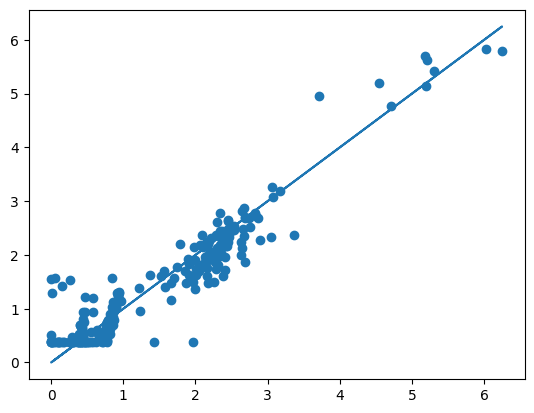

In [27]:
model_CF = CustomModel_CF()
criterion = nn.MSELoss()
optimizer = optim.Adam(model_CF.parameters(), lr = 0.0001)

# Learning Loop
num_epochs = 20000
losses = []

for epoch in range(num_epochs+1):
    # forward_propagation
    y_pred = model_CF(Xt)
    loss = criterion(y_pred,Yt)

    # back_propagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    if (epoch + 1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.6f}')



y_pred2 = model_CF(Xt)

plt.scatter(Y,y_pred2.detach().numpy())
plt.plot(Y,Y)

In [28]:
torch.save(model_CF.state_dict(), 'model_CF.pth')

## model 2

In [29]:
# Set the training data
X = df[['T','V','E','Ci','t']].values
Y = df[['CA']].values

# transform the pytorch tensor
Xt = torch.FloatTensor(X)
Xt = torch.nan_to_num(Xt, nan=0.0)
Yt = torch.FloatTensor(Y)
Yt = torch.nan_to_num(Yt, nan=0.0)

# Declare the Custom Models
class CustomModel_CA(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Sequential(
            nn.Linear(5,10),
            nn.ReLU(),
            nn.Linear(10,5),
            nn.ReLU(),
            nn.Linear(5,1)
        )

    def forward(self, x):
        return self.hidden(x)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
iter = 0
scores = []
for train_index, test_index in kfold.split(Xt):
    X_train, X_test = Xt[train_index], Xt[test_index]
    Y_train, Y_test = Yt[train_index], Yt[test_index]
    
    # NN model initialization
    model_CA = CustomModel_CA()
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model_CA.parameters(), lr = 0.0001)

    # Learning Loop
    num_epochs = 20000
    
    for epoch in range(num_epochs):
        # forward_propagation
        y_pred = model_CA(X_train)
        loss = criterion(y_pred,Y_train)

        # back_propagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 2000 == 0:
            print(f'iter : {iter+1}, epoch: {epoch}, loss: {loss.item()}')
    yp = model_CA(X_test).detach().numpy()
    Y_test = Y_test.detach().numpy()
    mse_score = mean_squared_error(Y_test,yp)
    scores.append(mse_score)
    iter += 1
print(sum(scores) / len(scores))



        

iter : 1, epoch: 0, loss: 1.009492039680481
iter : 1, epoch: 2000, loss: 0.275347501039505
iter : 1, epoch: 4000, loss: 0.25476667284965515
iter : 1, epoch: 6000, loss: 0.24936391413211823
iter : 1, epoch: 8000, loss: 0.24533890187740326
iter : 1, epoch: 10000, loss: 0.15719635784626007
iter : 1, epoch: 12000, loss: 0.07266149669885635
iter : 1, epoch: 14000, loss: 0.048628970980644226
iter : 1, epoch: 16000, loss: 0.03170499950647354
iter : 1, epoch: 18000, loss: 0.02413252741098404
iter : 2, epoch: 0, loss: 14.390179634094238
iter : 2, epoch: 2000, loss: 0.30322083830833435
iter : 2, epoch: 4000, loss: 0.2586812376976013
iter : 2, epoch: 6000, loss: 0.2161981165409088
iter : 2, epoch: 8000, loss: 0.12314063310623169
iter : 2, epoch: 10000, loss: 0.07520975172519684
iter : 2, epoch: 12000, loss: 0.04983939230442047
iter : 2, epoch: 14000, loss: 0.03851304203271866
iter : 2, epoch: 16000, loss: 0.022988656535744667
iter : 2, epoch: 18000, loss: 0.019540591165423393
iter : 3, epoch: 0, 

Epoch [10000/100000], Loss: 0.112795
Epoch [20000/100000], Loss: 0.076817
Epoch [30000/100000], Loss: 0.074909
Epoch [40000/100000], Loss: 0.074881
Epoch [50000/100000], Loss: 0.074862
Epoch [60000/100000], Loss: 0.074854
Epoch [70000/100000], Loss: 0.074836
Epoch [80000/100000], Loss: 0.074824
Epoch [90000/100000], Loss: 0.074817
Epoch [100000/100000], Loss: 0.074808


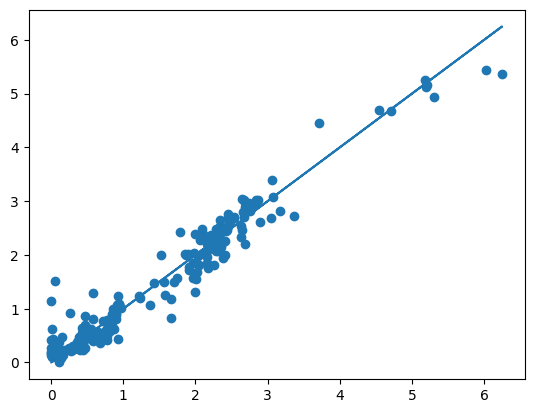

In [31]:

# NN model initialization
model_CA = CustomModel_CA()
criterion = nn.MSELoss()
optimizer = optim.Adam(model_CA.parameters(), lr = 0.0001)

# Learning Loop
num_epochs = 100000
losses = []

for epoch in range(num_epochs+1):
    # forward_propagation
    y_pred = model_CA(Xt)
    loss = criterion(y_pred,Yt)

    # back_propagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    if (epoch + 1) % 10000 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.6f}')

    y_pred2 = model_CA(Xt)

plt.scatter(Y,y_pred2.detach().numpy())
plt.plot(Y,Y)

In [32]:
torch.save(model_CA.state_dict(), 'model_CA.pth')